
## 实战项目：图像标注

---
这个项目我们要循环神经网络来实现图像标注功能。我们分成若干那个阶段来完成整个项目。我们当前这篇文章主要是实现加载COCO数据集合，获取图片和相应的标注说明。使用
Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [2]:
import os
import sys
import json
from pycocotools.coco import COCO
import warnings
warnings.filterwarnings('ignore')

dataDir = './'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# 获取图像id集合
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=11.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

In [3]:
import numpy as np
#import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

#pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)


# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

http://images.cocodataset.org/val2014/COCO_val2014_000000351466.jpg
A photo of a gated archway with a clock on top.
A large clock tower towering over a white building.
A clock tower over the entrance to a village.
A picture of a rot iron and gold clock.
 A TALL GATED TOWER WITH A HUGE CLOCK IN THE MIDDLE OF IT.


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060]
[nltk_data]     由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>


False

In [ ]:
z_ids = list(coco_caps.anns.keys())
for index in np.arange(len(z_ids)):
    print(index)
    break
caption = coco_caps.anns[z_ids[0]]['caption']
print(caption)
token = nltk.tokenize.word_tokenize(str(caption))
print(len(token))
print(token)

In [ ]:
import requests
from PIL import Image
from io import BytesIO

response = requests.get('http://images.cocodataset.org/val2014/COCO_val2014_000000351466.jpg')
image = np.array(Image.open(BytesIO(response.content)))
print(image.shape)

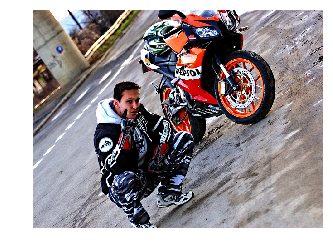

In [13]:
# I = io.imread(url)
plt.axis('off')
plt.imshow(image)
plt.show()

## Step 3: 接下来的任务！

在这个项目中，我们要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook 将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](images/encoder-decoder.png)